# Assigment 2

This is the link to Github: https://github.com/aruyralopez/EC_Assignment2

In [37]:
# Import packages

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore all warnings

## Data Kaggle

This is a description of the data downloaded from kaggle

The dataset is downloaded from kaggle (https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset) and is called "Credit Score Classification Dataset".
This dataset contains information about a sample of over 100 people across the world. 

The data includes the following information:

    -Age
    -Gender
    -Income
    -Education
    -Marital Status
    -Number of Children
    -Home Ownership
    -Credit Score

In [4]:
## Read the CSV and define it as df

df = pd.read_csv('credit_score.csv')

In [5]:
df.head() # Shows first 5 values of df, from 0 to 4 index

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [6]:
print(len(df)) #length of df
df.dtypes # type of df

164


Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [7]:
# We replace the " " by "_" in columns so it is easy and more accesible for our coding of the df.
df.columns = df.columns.str.replace(' ', '_')

In [8]:
# .unique() tells how many unique data is contain in the column
print('Gender', df.Gender.unique())
print('Education', df.Education.unique())
print('Marital_Status', df.Marital_Status.unique())
print('Home_Ownership', df.Home_Ownership.unique())
print('Credit_Score', df.Credit_Score.unique())

Gender ['Female' 'Male']
Education ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital_Status ['Single' 'Married']
Home_Ownership ['Rented' 'Owned']
Credit_Score ['High' 'Average' 'Low']


Our data is composed of 164 values and 8 columns, where 5 are object and 3 int64. Later we will convert Credit Score in int64 in order to make the regressions.

The information contain in object columns are:

    -Gender: Female, Male
    -Education: Bachelor's Degree, Master's Degree, Doctorate, High School Diploma, Associate's Degree
    -Marital_Status: Single, Married
    -Home_Ownership: Rented, Owned
    -Credit_Score: High, Average, Low

## Visualization

### Categorical Visualization

In [9]:
df['Gender'].value_counts(normalize = True) # From all the values get the proportion belonging to all the unique values.

Gender
Female    0.52439
Male      0.47561
Name: proportion, dtype: float64

In [10]:
df['Education'].value_counts(normalize = True)

Education
Bachelor's Degree      0.256098
Master's Degree        0.219512
Doctorate              0.189024
High School Diploma    0.182927
Associate's Degree     0.152439
Name: proportion, dtype: float64

In [11]:
df['Marital_Status'].value_counts(normalize = True)

Marital_Status
Married    0.530488
Single     0.469512
Name: proportion, dtype: float64

In [12]:
df['Home_Ownership'].value_counts(normalize = True)

Home_Ownership
Owned     0.676829
Rented    0.323171
Name: proportion, dtype: float64

In [13]:
df['Credit_Score'].value_counts(normalize = True)

Credit_Score
High       0.689024
Average    0.219512
Low        0.091463
Name: proportion, dtype: float64

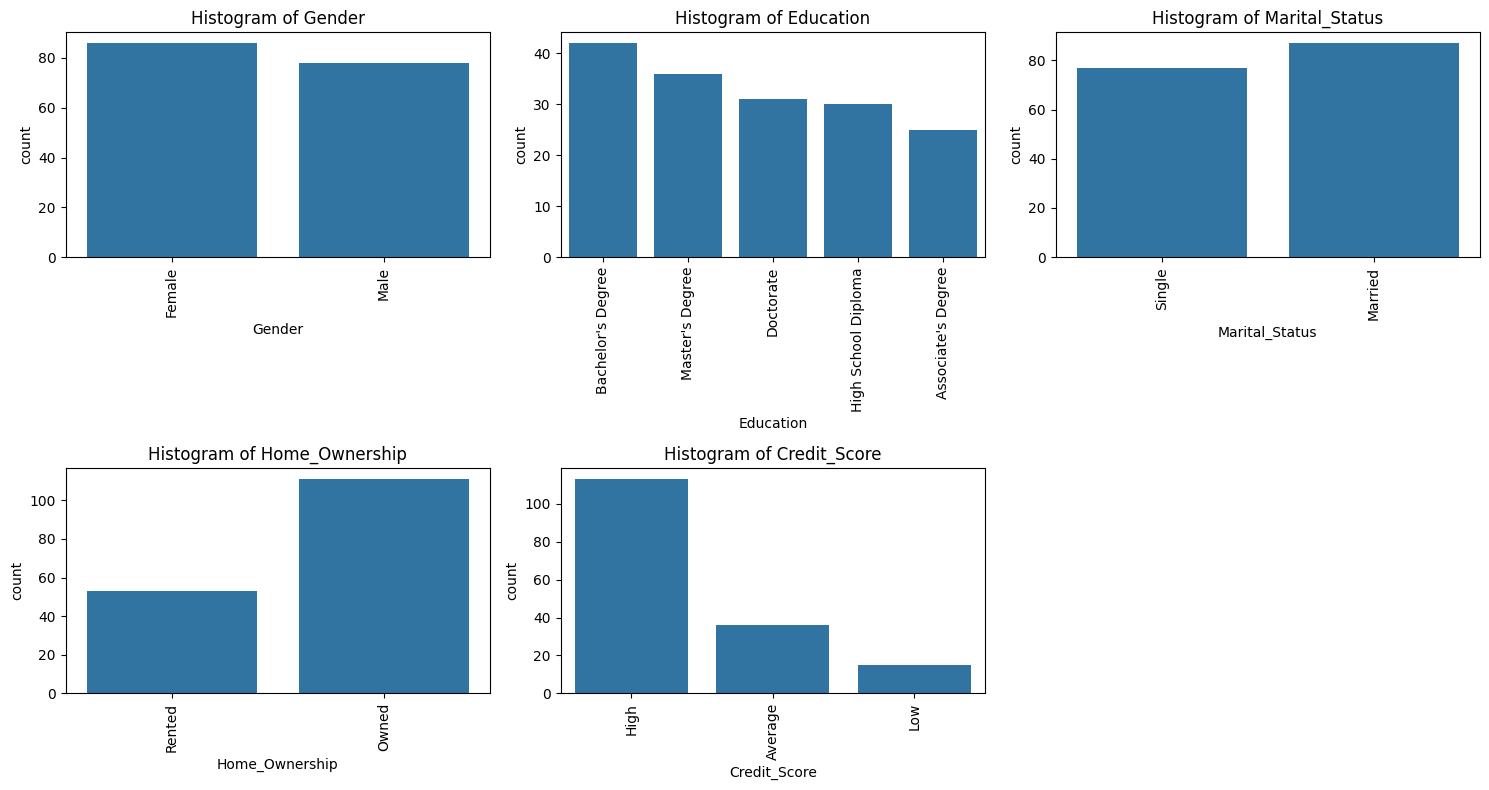

In [14]:
dfobjects = df.select_dtypes(include='object') # Select only categorical values

num_columns = dfobjects.shape[1]
num_rows = 2 
num_c_r = (num_columns + 1) // num_rows # Number of columns & shape to be shown on output

fig, axes = plt.subplots(num_rows, num_c_r, figsize=(5 * num_c_r, 4 * num_rows))

axes = axes.flatten()

for i, column in enumerate(dfobjects.columns):
    sns.countplot(data=dfobjects, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].tick_params(axis='x', rotation=90)  # We rotate the tags 90 grades so we can read them
# countplot as the graph use for our dfobjects

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The distribution of values for different columns shows as that: 

    -for gender there is 52% females and 48% males. Almost half-half for the sample.
    -for education there is 25% Bachelor's Degree, 19% Master's Degree, 18% Doctorate, another 18% High School Diploma and 15% Associate's Degree. 1/4 of sample has maximum Bachelors degree.
    -for marital status: 53% are married and 47% are single.
    -for home ownership: 32% are rented and 68% owned. Most of the sample owned a house.
    -for credit score 69% High, 22% Average and 9% Low. Meaning that most sample have high or medium score.

Here we can start to sense some sample bias affecting this sample. As looking at this numbers this could not be a real sample of the population regarding housing and education.

### Numerical Visualization

In [15]:
df['Age'].describe() # Describes the column selected by: count, mean, std, min, 25%, 50%, 75% & max.

count    164.000000
mean      37.975610
std        8.477289
min       25.000000
25%       30.750000
50%       37.000000
75%       45.000000
max       53.000000
Name: Age, dtype: float64

In [16]:
df['Income'].describe()

count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64

In [17]:
df['Number_of_Children'].describe() 

count    164.000000
mean       0.652439
std        0.883346
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Number_of_Children, dtype: float64

In [18]:
# Because number of children only ranges between 0 to 3 its posible to value_counts, 
# its a numerical value but it can also be interpreted as categorical in some way
df['Number_of_Children'].value_counts(normalize = True)

Number_of_Children
0    0.591463
1    0.195122
2    0.182927
3    0.030488
Name: proportion, dtype: float64

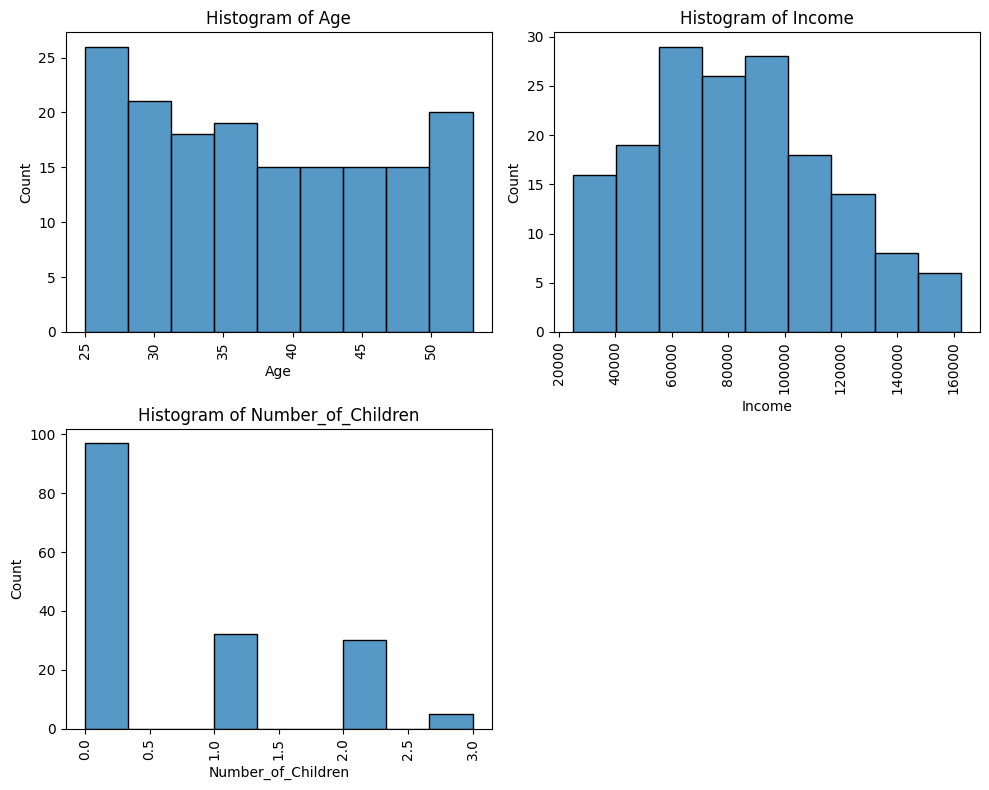

In [19]:
dfint64 = df.select_dtypes(include='int64') # Select only numerical values

num_columns = dfint64.shape[1]
num_rows = 2
num_c_r = (num_columns + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_c_r, figsize=(5 * num_c_r, 4 * num_rows))

axes = axes.flatten()

for i, column in enumerate(dfint64.columns):
    sns.histplot(data=dfint64, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].tick_params(axis='x', rotation=90)  # We rotate the tags 90 grades so we can read them

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The analysis of data by describe() and by graphs shows us:

    - for number of children we see that 59% have 0, 19% 1, 18% 2 and 3% 3. From here we take that 59% sample dont have kids and 41% have. The mean of children is 0.6
    - for age the sample has people from 25 to 53 years old, with the mean at 38 but looking at the graph kind of looks like distributed but with high concentration on ages between 25 and 30.
    - for income the sample ranges between 25000 to 162500, the mean is 83765, and most sample is distributed between 60000 and 10000.488

Looking at the sample we can say that most of the sample have high paying jobs which is not indicative of the normal population.

### Mix Visualization

After taking a look at description and visualization of all our data we are going to analyze different data that could be normal to assume.
This is as

    - High incomes should have more kids
    - Married marital status should have kids
    - High incomes should have owned houses
    - Older people should have high income 
    - There should be distinctions of income between the differents educations.
    - Maybe as you get older you get more educated
    - Home ownership with age, older people should own houses.

We will take a look at it.

#### Income-Number_of_Children-Marital_Status

<Axes: xlabel='Income', ylabel='Number_of_Children'>

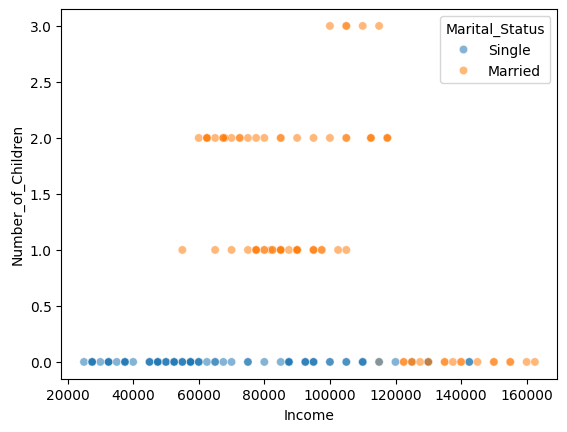

In [20]:
sns.scatterplot(data=df , x='Income', y='Number_of_Children',  hue='Marital_Status', alpha=0.55) 
# scatterplot of df selecting the x & y values and hue is a categorical data able to be taken into account.

The distribution of kids and income is distributed as of 0 kids you are in the full range, and with kids all are bewteen 45000 and 12000. Here we can say that haveing kids costs money so you need a minimum in order to have them, and as you have more the income required needs to be higher, this is clearly appreciated with 3 kids. What we see is that all samples that have kids are married. And married samples that have 0 kids have higher incomes compared to all the sample.

#### Income-Age-Home_Ownership

<Axes: xlabel='Income', ylabel='Age'>

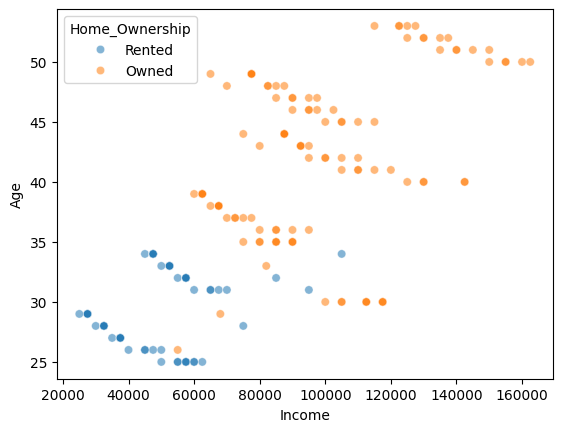

In [21]:
sns.scatterplot(data=df , x='Income', y='Age', hue='Home_Ownership', alpha=0.55)

We can clearly see a pattern that points that your income linearly increases with your age, and that from 60000 income and 35 age the norm is to own a house, meaning that lower income and lower ages is normal to rent.

#### Income-Age-Education

<Axes: xlabel='Income', ylabel='Age'>

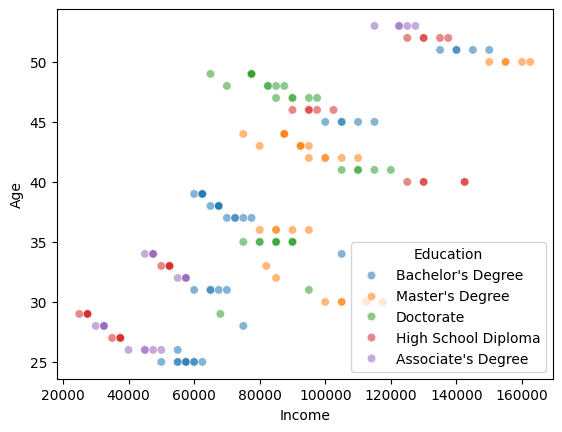

In [22]:
sns.scatterplot(data=df , x='Income', y='Age', hue='Education', alpha=0.55)

The relationship between age, income and education its not clear as the others we looked at. There is not clear relationship between education and income, and there is not clear relationship between age and education. The only aparent cluster that is notizable is that doctorate sample are between income range of 70000 and 120000.

## Hypothesis & Regressions

We are interested in our credit score column. From the start we can theoryze that higher income means higher credit score, owning a house means higher credit score, & maybe the age can be significant?

We are going to create 3 hypothesis & then a multiple linear regression model to achieve the highest Adjusted R-Squared.

First we are going to create a numerical credit_score which is the credit score object to int64 (factorize) assigning numerical values to its values being:

    - high=2
    - Average=1
    - low=0

In [23]:
df['num_credit_score'] = df['Credit_Score'].replace({'High': 2, 'Average': 1, 'Low': 0})

In [24]:
df.head()

,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score,num_credit_score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High,2
1,30,Male,100000,Master's Degree,Married,2,Owned,High,2
2,35,Female,75000,Doctorate,Married,1,Owned,High,2
3,40,Male,125000,High School Diploma,Single,0,Owned,High,2
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High,2


### Hypothesis 1

For our hypothesis 1 we want to measure if there is a relation between credit score and income, so first we will compute a pearson to see if there is correlation:
$$H_0=There\;isnt\;correlation$$
$$H_1=There\;is\;correlation$$

And then we will see if income is able to predict credit score wit a OLS regression.

In [25]:
# Compute correlation between income and credit score
correlation, p_value = pearsonr(df['Income'], df['num_credit_score'])

print(f"Correlation coefficient: {correlation:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Significant correlation: Higher income is associated with higher credit scores.")
else:
    print("No significant correlation between income and credit scores.")

Correlation coefficient: 0.744
p-value: 0.000
Significant correlation: Higher income is associated with higher credit scores.


In [26]:
formula_string = "num_credit_score ~ Income"

model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       num_credit_score   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     201.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           3.22e-30
Time:                        20:34:05   Log-Likelihood:                -95.998
No. Observations:                 164   AIC:                             196.0
Df Residuals:                     162   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3436      0.095      3.627      0.0

We see that with R^2=0.55that 55% of the variability in credit score can be explained by income. Meaning that it can be a strong predictor

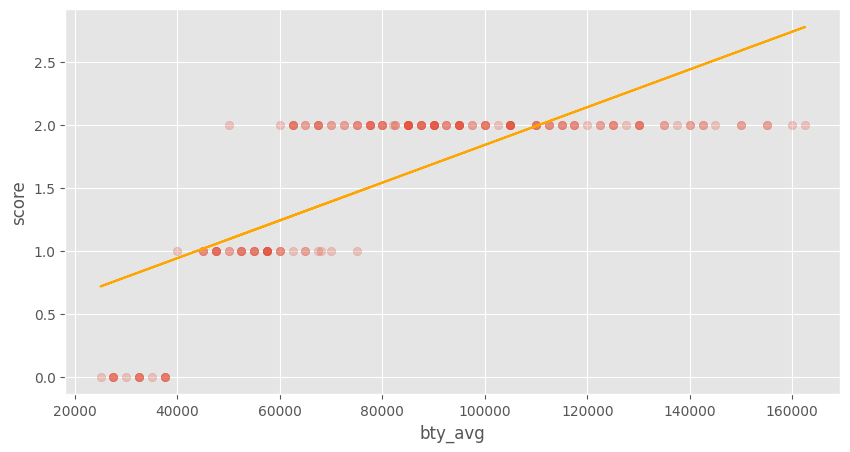

In [27]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

x = df.Income
y = df.num_credit_score

y_pred = model_fitted.predict(x)

plt.scatter(df.Income, df.num_credit_score, alpha=0.25)
plt.plot(x, y_pred, color = 'orange')

plt.xlabel('bty_avg')
plt.ylabel('score')
plt.show();

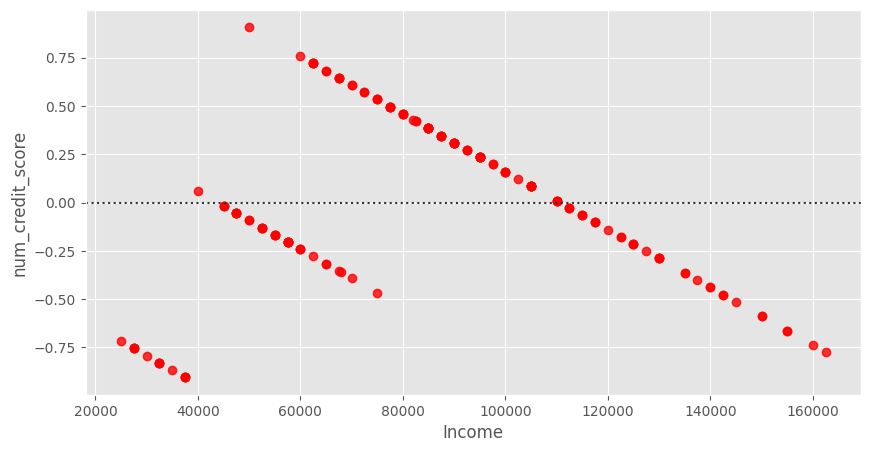

In [28]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.residplot(data = df, x = 'Income', y = 'num_credit_score', color = 'red')
plt.show();

### Hypothesis 2

The hypothesis 2 is is the same as hypothesis 1, but with a categorical value so other package is needed, but with the ols we can get from the R^2 the r so we will see if there is correlation:
$$H_0=There\;isnt\;correlation$$
$$H_1=There\;is\;correlation$$

In [29]:
aov = smf.ols('num_credit_score ~ C(Home_Ownership)', data=df).fit() # for categorical we need to use other package
aov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       num_credit_score   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     440.2
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           4.75e-48
Time:                        20:34:05   Log-Likelihood:                -54.572
No. Observations:                 164   AIC:                             113.1
Df Residuals:                     162   BIC:                             119.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.9820      0.032     61.492      0.000       1.918       2.046
C(Home_Ownership)[T.Rented]    -1.1895      0.057    -20.980      0.000      -1.301      -1.078
==============================================================================
Omnibus:                       27.419   Durbin-Watson:                   2.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.473
Skew:                          -0.319   Prob(JB):                     7.78e-34
Kurtosis:                       7.680   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
result = math.sqrt(0.731)
round(result, 2)

0.85

R^2 is 0.731 so r is 0.85 which suggest: Significant correlation: Owning homes is associated with higher credit scores.

### Hypothesis 3

The hypothesis 3 is the same as hypothesis 3, we will see if there is correlation between age and credit score so:
$$H_0=There\;isnt\;correlation$$
$$H_1=There\;is\;correlation$$

And then we will see if age is able to predict credit score wit a OLS regression.

In [31]:
correlation, p_value = pearsonr(df['Age'], df['num_credit_score'])

print(f"Correlation coefficient: {correlation:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Significant correlation: Higher age is associated with higher credit scores.")
else:
    print("No significant correlation between age and credit scores.")

Correlation coefficient: 0.669
p-value: 0.000
Significant correlation: Higher age is associated with higher credit scores.


In [32]:
formula_string = "num_credit_score ~ Age"

model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       num_credit_score   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     131.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.23e-22
Time:                        20:34:05   Log-Likelihood:                -113.57
No. Observations:                 164   AIC:                             231.1
Df Residuals:                     162   BIC:                             237.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3586      0.175     -2.050      0.0

We see that with R^2=0.48 that 48% of the variability in credit score can be explained by age. Meaning that age is a strong predictor but because its not up 0.5, its not a sole determinant.

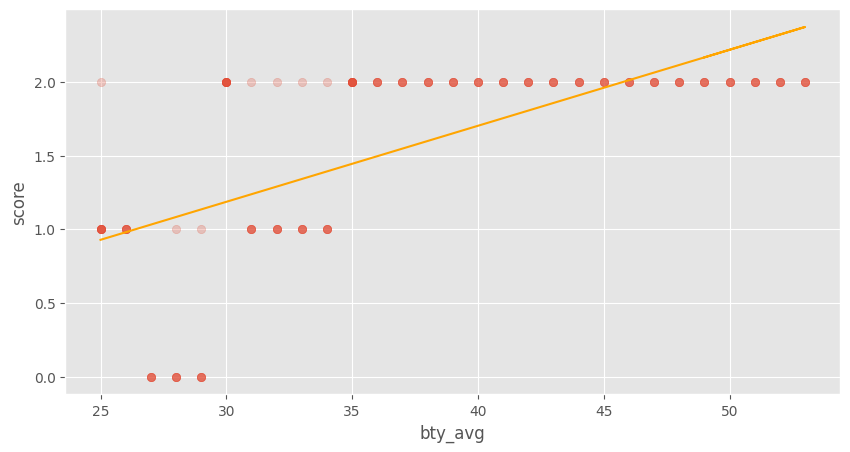

In [33]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

x = df.Age
y = df.num_credit_score

y_pred = model_fitted.predict(x)

plt.scatter(df.Age, df.num_credit_score, alpha=0.25)
plt.plot(x, y_pred, color = 'orange')

plt.xlabel('bty_avg')
plt.ylabel('score')
plt.show();

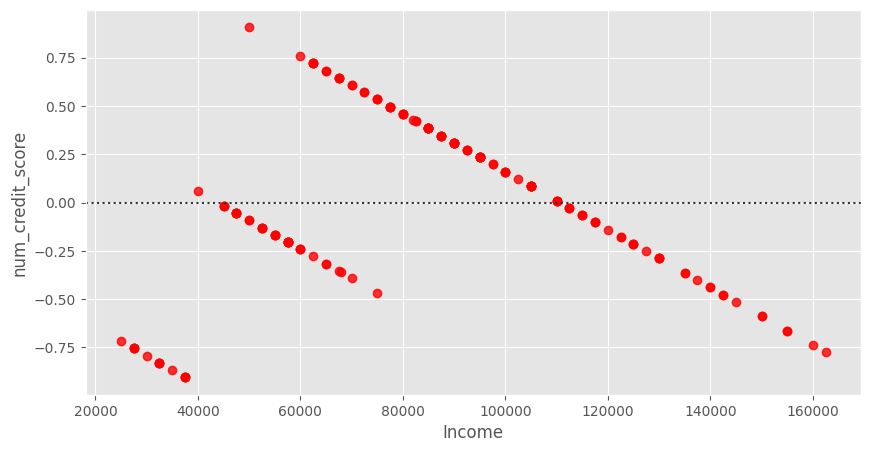

In [34]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.residplot(data = df, x = 'Income', y = 'num_credit_score', color = 'red')
plt.show();

#### Multiple linear regression

We are going to introduce the 3 factors tested before and then we will try to find the best R^2 for our multiple linear regression.

In [35]:
m_full = sm.formula.ols(formula = 'num_credit_score ~ Age + Income + Home_Ownership', data = df)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       num_credit_score   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     179.5
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           5.61e-51
Time:                        20:34:06   Log-Likelihood:                -41.391
No. Observations:                 164   AIC:                             90.78
Df Residuals:                     160   BIC:                             103.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The adjusted R^2 at 0.767 its much better than any of the other OLS before but still we will search for the best

In [36]:
m_full = sm.formula.ols(formula = 'num_credit_score ~ Age + Income + Home_Ownership + Education + Number_of_Children + Gender ', data = df)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       num_credit_score   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     84.54
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           5.23e-55
Time:                        20:34:06   Log-Likelihood:                -16.123
No. Observations:                 164   AIC:                             52.25
Df Residuals:                     154   BIC:                             83.25
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

It seems that aggregating all factors except Marital_Status improve our regression to a R^2 at 0.822 which means that 82.2% of the variability in credit score can be explained by our regression.